<a href="https://colab.research.google.com/github/alexeylazarev13/da_homeworks/blob/main/project_da_12_09_2022_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import io
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import *
%matplotlib inline
plt.style.use('ggplot')
import json
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/csv/wiki_movie_plots_deduped.csv')

Mounted at /content/drive


In [3]:
df.head(3)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."


**Быстрый анализ датасета с помощью sweetviz:**

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
my_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report.show_html('SWEETVIZ_REPORT.html')

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
import IPython
IPython.display.HTML(filename='SWEETVIZ_REPORT.html')

**1. Подготовьте гистограммы по самым популярным жанрам, режиссерам, нац. принадлежностям фильмов, годам**

**1.1 Гистограмма по самым популярных жанрам:**

In [4]:
genre_counts = df["Genre"].value_counts().head(11)
genre_counts


unknown      6083
drama        5964
comedy       4379
horror       1167
action       1098
thriller      966
romance       923
western       865
crime         568
adventure     526
musical       467
Name: Genre, dtype: int64

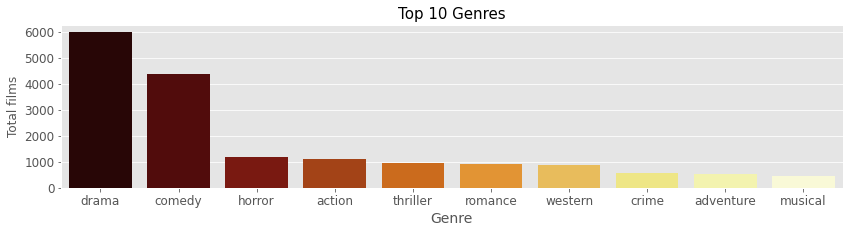

In [5]:
genre_counts = df["Genre"].value_counts().head(11)
genre_counts_without_unknown =  genre_counts[['drama', 'comedy', 'horror', 'action', 'thriller', 'romance', 'western', 'crime', 'adventure', 'musical']]
new_genre_counts_without_unknown = genre_counts_without_unknown.reset_index()
new_genre_counts_without_unknown.rename(columns={'index': 'genre', 'Genre': 'count'}, inplace=True)
plt.subplots(figsize=(14,3))
sns.barplot(y=new_genre_counts_without_unknown['count'],x=new_genre_counts_without_unknown['genre'],data=new_genre_counts_without_unknown,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Total films',fontsize=12)
plt.title('Top 10 Genres',fontsize=15)
plt.show()

**1.2 Гистограмма по самым популярных режиссерам:**

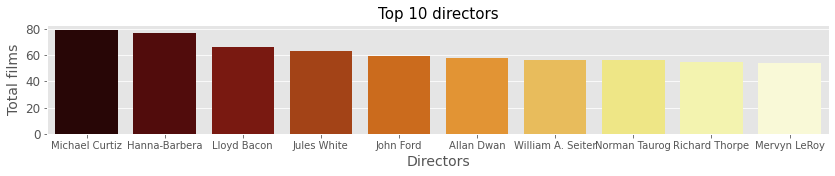

In [6]:
director_counts = df["Director"].value_counts().head(11)
director_counts_without_unknown =  director_counts[['Michael Curtiz', 'Hanna-Barbera', 'Lloyd Bacon', 'Jules White', 'John Ford', 'Allan Dwan', 'William A. Seiter', 'Norman Taurog', 'Richard Thorpe', 'Mervyn LeRoy']]
new_director_counts_without_unknown = director_counts_without_unknown.reset_index()
new_director_counts_without_unknown.rename(columns={'index': 'director', 'Director': 'count'}, inplace=True)
plt.subplots(figsize=(14,2))
sns.barplot(y=new_director_counts_without_unknown['count'],x=new_director_counts_without_unknown['director'],data=new_director_counts_without_unknown,palette='afmhot')
plt.xticks(fontsize=10)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Directors',fontsize=14)
plt.ylabel('Total films',fontsize=14)
plt.title('Top 10 directors',fontsize=15)
plt.show()


**1.3 Гистограмма по самым популярных нац. принадлежностям фильмов:**

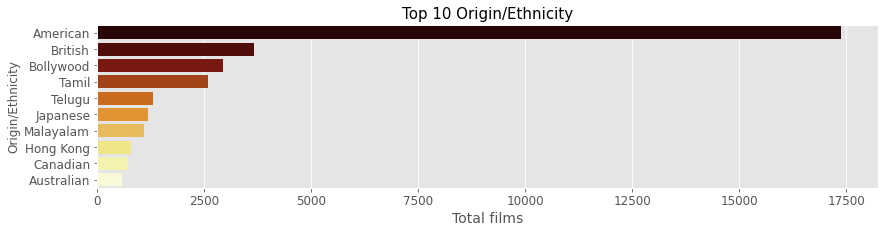

In [7]:
origin_counts = df["Origin/Ethnicity"].value_counts().head(10)
origin_counts =  origin_counts[['American', 'British', 'Bollywood', 'Tamil', 'Telugu', 'Japanese', 'Malayalam', 'Hong Kong', 'Canadian', 'Australian']]
origin_counts_wo_index = origin_counts.reset_index()
origin_counts_wo_index.rename(columns={'index': 'origin', 'Origin/Ethnicity': 'count'}, inplace=True)

plt.subplots(figsize=(14,3))
sns.barplot(y=origin_counts_wo_index['origin'],x=origin_counts_wo_index['count'],data=origin_counts_wo_index,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Total films',fontsize=14)
plt.ylabel('Origin/Ethnicity',fontsize=12)
plt.title('Top 10 Origin/Ethnicity',fontsize=15)
plt.show()

**1.4 Гистограмма по самым популярным годам производства фильмов:**

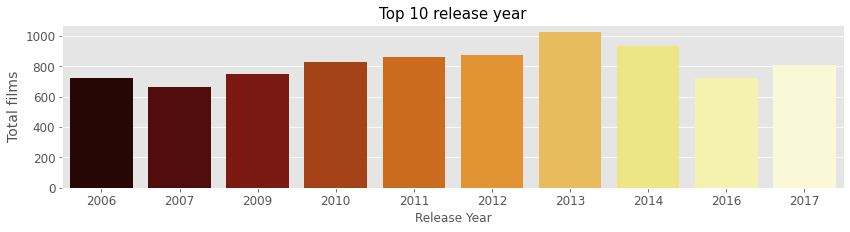

In [8]:
release_year_counts = df["Release Year"].value_counts().head(10)
release_year_counts_wo_index = release_year_counts.reset_index()
release_year_counts_wo_index.rename(columns={'index': 'release year', 'Release Year': 'count'}, inplace=True)
plt.subplots(figsize=(14,3))
sns.barplot(y=release_year_counts_wo_index['count'],x=release_year_counts_wo_index['release year'],data=release_year_counts_wo_index,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Total films',fontsize=14)
plt.title('Top 10 release year',fontsize=15)
plt.show()


**2. Sentiment analysis по отзывам (используя  nltk.classify) и оценка, как распределяется sentiment по актерам, режиссерам и жанрам**

In [9]:
df.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."


**Чистим данные:**

In [10]:
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [11]:
df_copy = df.copy()

In [12]:
df_copy.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."


**Перевод в нижний регистр:**

In [13]:
df_copy['Plot'] = df_copy['Plot'].str.lower()
df_copy.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"a bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"the moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"the film, just over a minute long, is composed..."


**Удаление знаков препинания:**

In [14]:
df_copy["Plot_replace"] = df_copy['Plot'].str.replace('[^\w\s]','')
#df = df.drop('column_name', axis=1)
df_copy.head(3)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Plot_replace
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"a bartender is working at a saloon, serving dr...",a bartender is working at a saloon serving dri...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"the moon, painted with a smiling face hangs ov...",the moon painted with a smiling face hangs ove...
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"the film, just over a minute long, is composed...",the film just over a minute long is composed o...


**Удаление стоп-слов:**

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stopWords=set(stopwords.words('english'))
print(stopWords)

{'wasn', 'are', 'or', 'it', 'above', 't', "isn't", 'him', "you're", 'yourselves', 'until', 'don', 'hasn', 'didn', 'should', "didn't", 'with', 'haven', 'whom', 'some', "should've", 'that', 'did', 'against', 'while', 'when', 'their', 'such', 'his', 'these', 'were', 'myself', "aren't", "you've", 'me', 'my', "weren't", 'as', 'the', 'needn', 'they', 'theirs', 'how', 'was', 'doing', 'for', "doesn't", 'a', 'at', 's', 'same', 'below', 'doesn', 'up', 'out', 'do', "you'd", 're', 'there', 'themselves', 'wouldn', 'both', 'y', 'just', 'shan', "mightn't", 'you', "you'll", "haven't", 'about', 'few', 'yourself', 'itself', 'mightn', 'very', "needn't", 've', "that'll", 'he', 'our', 'have', 'under', 'nor', 'can', 'in', 'here', 'aren', 'mustn', 'an', 'and', 'only', 'has', 'own', 'been', 'hers', 'she', 'by', 'hadn', 'does', 'between', 'too', 'herself', 'being', 'but', 'shouldn', 'those', 'himself', 'what', 'most', 'having', "wouldn't", 'will', 'no', 'not', 'through', 'to', 'of', 'which', 'ain', 'isn', 'our

In [17]:
!pip install texthero

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 8.0 MB/s 
     |████████████████████████████████| 10.4 MB 43.8 MB/s 
     |████████████████████████████████| 1.0 MB 51.3 MB/s 
     |████████████████████████████████| 184 kB 56.0 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.0
    Uninstalling thinc-8.1.0:
      Successfully uninstalled thinc-8.1.0
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.1
    Uninstalling spacy-3.4.1:
      Successfully uninstalled spacy-3.4.1
ERROR: pip's dependency resolver does not currently take into

In [18]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.0 MB/s 
     |████████████████████████████████| 803 kB 38.2 MB/s 
     |████████████████████████████████| 458 kB 32.9 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.5
    Uninstalling thinc-7.4.5:
      Successfully uninstalled thinc-7.4.5
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.7
    Uninstalling spacy-2.3.7:
      Successfully uninstalled spacy-2.3.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [19]:
import texthero as hero

In [20]:
df_copy["Plot_replace_without_stopwords"] = hero.remove_stopwords(df_copy['Plot_replace'])
df_copy['Plot_replace_without_stopwords'].head(3)

0     bartender  working   saloon serving drinks  c...
1     moon painted   smiling face hangs   park  nig...
2     film    minute long  composed  two shots   fi...
Name: Plot_replace_without_stopwords, dtype: object

**Оценка как распределяется sentiment по жанрам:**

In [35]:
data = df_copy[['Plot_replace_without_stopwords', 'Genre', 'Director']]
data.head(3)

,Plot_replace_without_stopwords,Genre,Director
0,bartender working saloon serving drinks c...,unknown,Unknown
1,moon painted smiling face hangs park nig...,unknown,Unknown
2,film minute long composed two shots fi...,unknown,Unknown


**Попробуем Vader для анализа текста:**

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [23]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [36]:
data['scores'] = data['Plot_replace_without_stopwords'].apply(lambda Plot_replace_without_stopwords: vader.polarity_scores(Plot_replace_without_stopwords))
data.head(3)

,Plot_replace_without_stopwords,Genre,Director,scores
0,bartender working saloon serving drinks c...,unknown,Unknown,"{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'comp..."
1,moon painted smiling face hangs park nig...,unknown,Unknown,"{'neg': 0.039, 'neu': 0.705, 'pos': 0.256, 'co..."
2,film minute long composed two shots fi...,unknown,Unknown,"{'neg': 0.128, 'neu': 0.802, 'pos': 0.07, 'com..."


In [37]:
data['compound'] = data['scores'].apply(lambda score_dict: score_dict['compound'])
data.head(3)

,Plot_replace_without_stopwords,Genre,Director,scores,compound
0,bartender working saloon serving drinks c...,unknown,Unknown,"{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'comp...",-0.7269
1,moon painted smiling face hangs park nig...,unknown,Unknown,"{'neg': 0.039, 'neu': 0.705, 'pos': 0.256, 'co...",0.8934
2,film minute long composed two shots fi...,unknown,Unknown,"{'neg': 0.128, 'neu': 0.802, 'pos': 0.07, 'com...",-0.4215


In [38]:
data['sentiment'] = data['compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
data.head(3)

,Plot_replace_without_stopwords,Genre,Director,scores,compound,sentiment
0,bartender working saloon serving drinks c...,unknown,Unknown,"{'neg': 0.117, 'neu': 0.883, 'pos': 0.0, 'comp...",-0.7269,neg
1,moon painted smiling face hangs park nig...,unknown,Unknown,"{'neg': 0.039, 'neu': 0.705, 'pos': 0.256, 'co...",0.8934,pos
2,film minute long composed two shots fi...,unknown,Unknown,"{'neg': 0.128, 'neu': 0.802, 'pos': 0.07, 'com...",-0.4215,neg


In [ ]:
#from sklearn.metrics import accuracy_score
#потом можно будет сравнить результаты оценки разными способами

**Уберем те строки, где жанр неизвестен:**

In [43]:
data_copy = data[data['Genre'] != 'unknown']
data_copy.head(3)

,Plot_replace_without_stopwords,Genre,Director,scores,compound,sentiment
6,film opens two bandits breaking railroad t...,western,Edwin S. Porter,"{'neg': 0.206, 'neu': 0.683, 'pos': 0.111, 'co...",-0.9349,neg
7,film family move suburbs hoping quiet...,comedy,Wallace McCutcheon,"{'neg': 0.346, 'neu': 0.551, 'pos': 0.103, 'co...",-0.7650,neg
10,rarebit fiend gorges welsh rarebit restaur...,short,Wallace McCutcheon and Edwin S. Porter,"{'neg': 0.067, 'neu': 0.832, 'pos': 0.102, 'co...",0.4939,pos


In [44]:
data_copy = data[data['Director'] != 'Unknown']
data_copy.head(3)

,Plot_replace_without_stopwords,Genre,Director,scores,compound,sentiment
4,earliest known adaptation classic fairytale...,unknown,"George S. Fleming, Edwin S. Porter","{'neg': 0.138, 'neu': 0.73, 'pos': 0.132, 'com...",-0.3612,neg
5,alice follows large white rabbit rabbithole...,unknown,Cecil Hepworth,"{'neg': 0.102, 'neu': 0.786, 'pos': 0.112, 'co...",-0.1779,neg
6,film opens two bandits breaking railroad t...,western,Edwin S. Porter,"{'neg': 0.206, 'neu': 0.683, 'pos': 0.111, 'co...",-0.9349,neg


In [45]:
data_copy_index = data_copy['Genre'].value_counts('sentiment').head(10)
data_copy_index

drama        0.174812
unknown      0.159854
comedy       0.128813
horror       0.034092
action       0.031989
thriller     0.028434
romance      0.027072
western      0.025621
crime        0.016794
adventure    0.015580
Name: Genre, dtype: float64

In [46]:
data_copy_index2 = data_copy['Director'].value_counts('sentiment').head(10)
data_copy_index2

Michael Curtiz       0.002340
Hanna-Barbera        0.002281
Lloyd Bacon          0.001955
Jules White          0.001866
John Ford            0.001748
Allan Dwan           0.001718
Norman Taurog        0.001659
William A. Seiter    0.001659
Richard Thorpe       0.001629
Mervyn LeRoy         0.001599
Name: Director, dtype: float64

In [47]:
data_copy_without_index = data_copy_index.reset_index()
data_copy_without_index.head(3)

,index,Genre
0,drama,0.174812
1,unknown,0.159854
2,comedy,0.128813


In [ ]:
data_copy_without_index = data_copy_index.reset_index()
data_copy_without_index.head(3)

In [51]:
data_copy_without_index2 = data_copy_index2.reset_index()
data_copy_without_index2.head(3)

,index,Director
0,Michael Curtiz,0.002340
1,Hanna-Barbera,0.002281
2,Lloyd Bacon,0.001955


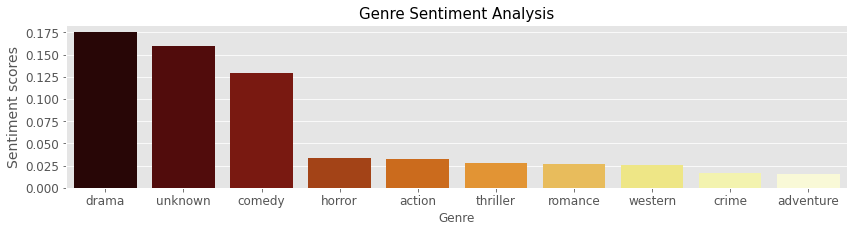

In [49]:
plt.subplots(figsize=(14,3))
sns.barplot(y=data_copy_without_index['Genre'],x=data_copy_without_index['index'],data=data_copy_without_index,palette='afmhot')
plt.xticks(fontsize=12)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Sentiment scores',fontsize=14)
plt.title('Genre Sentiment Analysis',fontsize=15)
plt.show()

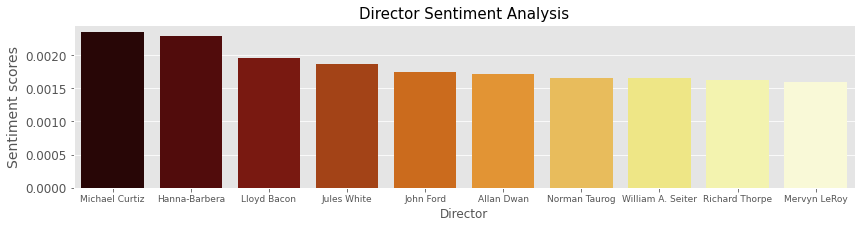

In [55]:
plt.subplots(figsize=(14,3))
sns.barplot(y=data_copy_without_index2['Director'],x=data_copy_without_index2['index'],data=data_copy_without_index2,palette='afmhot')
plt.xticks(fontsize=9)# Установить размер шрифта шкалы
plt.yticks(fontsize=12)
plt.xlabel('Director',fontsize=12)
plt.ylabel('Sentiment scores',fontsize=14)
plt.title('Director Sentiment Analysis',fontsize=15)
plt.show()

**Вернемся к условию и nltk.classify.**

In [56]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews

In [57]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [58]:
def extract_features(word_list):
  return dict([(word, True) for word in word_list])

In [59]:
if __name__== '__main__':
  positive_fileids = movie_reviews.fileids('pos')
  negative_fileids = movie_reviews.fileids('neg')

In [60]:
features_positive = [(extract_features(movie_reviews.words(fileids=[f])), 
           'Positive') for f in positive_fileids]
features_negative = [(extract_features(movie_reviews.words(fileids=[f])), 
           'Negative') for f in negative_fileids]

In [61]:
threshold_factor = 0.8
threshold_positive = int(threshold_factor * len(features_positive))
threshold_negative = int(threshold_factor * len(features_negative))

In [62]:
features_train = features_positive[:threshold_positive] + features_negative[:threshold_negative]
features_test = features_positive[threshold_positive:] + features_negative[threshold_negative:]
print('\nNumber of training datapoints:', len(features_train))
print("Number of test datapoints:", len(features_test))


Number of training datapoints: 1600
Number of test datapoints: 400


In [63]:
classifier = NaiveBayesClassifier.train(features_train)
print("Accuracy of the classifier:", nltk.classify.util.accuracy(classifier, features_test))

Accuracy of the classifier: 0.735


In [126]:
input = data_copy.copy()

In [147]:
input_reviews = input[:50]
input_reviews

,Plot_replace_without_stopwords,Genre,Director,scores,compound,sentiment
4,earliest known adaptation classic fairytale...,unknown,"George S. Fleming, Edwin S. Porter","{'neg': 0.138, 'neu': 0.73, 'pos': 0.132, 'com...",-0.3612,neg
5,alice follows large white rabbit rabbithole...,unknown,Cecil Hepworth,"{'neg': 0.102, 'neu': 0.786, 'pos': 0.112, 'co...",-0.1779,neg
6,film opens two bandits breaking railroad t...,western,Edwin S. Porter,"{'neg': 0.206, 'neu': 0.683, 'pos': 0.111, 'co...",-0.9349,neg
7,film family move suburbs hoping quiet...,comedy,Wallace McCutcheon,"{'neg': 0.346, 'neu': 0.551, 'pos': 0.103, 'co...",-0.7650,neg
8,opening scene shows interior robbers den ...,unknown,Edwin Stanton Porter,"{'neg': 0.131, 'neu': 0.724, 'pos': 0.146, 'co...",0.6908,pos
9,scenes introduced using lines poem2 santa c...,unknown,Edwin Stanton Porter,"{'neg': 0.049, 'neu': 0.802, 'pos': 0.149, 'co...",0.6597,pos
10,rarebit fiend gorges welsh rarebit restaur...,short,Wallace McCutcheon and Edwin S. Porter,"{'neg': 0.067, 'neu': 0.832, 'pos': 0.102, 'co...",0.4939,pos
11,film features train traveling rockies ho...,short action/crime western,Francis J. Marion and Wallace McCutcheon,"{'neg': 0.12, 'neu': 0.731, 'pos': 0.15, 'comp...",-0.0258,neg
12,irish villager kathleen tenant captain clea...,short film,Edwin S. Porter,"{'neg': 0.208, 'neu': 0.743, 'pos': 0.049, 'co...",-0.8176,neg
13,boones daughter befriends indian maiden boon...,biographical,Wallace McCutcheon and Ediwin S. Porter,"{'neg': 0.271, 'neu': 0.638, 'pos': 0.09, 'com...",-0.9485,neg


In [148]:
#print("\nPredictions:")
for review in input_reviews['Plot_replace_without_stopwords']:
  #print("\nReview:", review)
  probdist = classifier.prob_classify(extract_features(review.split()))
  pred_sentiment = probdist.max()
  print ("Predicted sentiment:", pred_sentiment) 
  print ("Probability:", round(probdist.prob(pred_sentiment), 2))
  #for i in range(len(input_reviews)):
  #  input_reviews.apply(pd.DataFrame(pred_sentiment))

Predicted sentiment: Positive
Probability: 0.99
Predicted sentiment: Positive
Probability: 1.0
Predicted sentiment: Negative
Probability: 1.0
Predicted sentiment: Positive
Probability: 0.69
Predicted sentiment: Positive
Probability: 1.0
Predicted sentiment: Positive
Probability: 0.98
Predicted sentiment: Negative
Probability: 0.82
Predicted sentiment: Negative
Probability: 0.81
Predicted sentiment: Positive
Probability: 1.0
Predicted sentiment: Positive
Probability: 0.97
Predicted sentiment: Negative
Probability: 0.68
Predicted sentiment: Positive
Probability: 1.0
Predicted sentiment: Positive
Probability: 0.53
Predicted sentiment: Positive
Probability: 0.77
Predicted sentiment: Positive
Probability: 0.97
Predicted sentiment: Positive
Probability: 0.94
Predicted sentiment: Positive
Probability: 0.71
Predicted sentiment: Positive
Probability: 1.0
Predicted sentiment: Positive
Probability: 0.99
Predicted sentiment: Positive
Probability: 0.77
Predicted sentiment: Positive
Probability: 0.8